# Introducción a las Pruebas de Hipótesis
Las pruebas de hipótesis son herramientas esenciales en la ciencia de datos para tomar decisiones basadas en evidencia estadística.

## ¿Qué es una Prueba de Hipótesis?
- **Definición:** Procedimiento estadístico que evalúa la validez de una afirmación sobre una población basada en datos muestrales.
- **Objetivo:** Determinar si hay suficiente evidencia estadística en los datos muestrales para rechazar la hipótesis nula (H0) a favor de la alternativa (H1).
- **Ejemplo base:** Supongamos que queremos probar si el ingreso promedio mensual de una población es de $50,000.

In [1]:
# Ejemplo base: Generamos una muestra simulada de ingresos mensuales
import numpy as np
np.random.seed(42)
media_poblacional = 50000
desviacion = 8000
n = 100
muestra = np.random.normal(loc=media_poblacional, scale=desviacion, size=n)
print(f'Media muestral: {muestra.mean():.2f}')

Media muestral: 49169.23


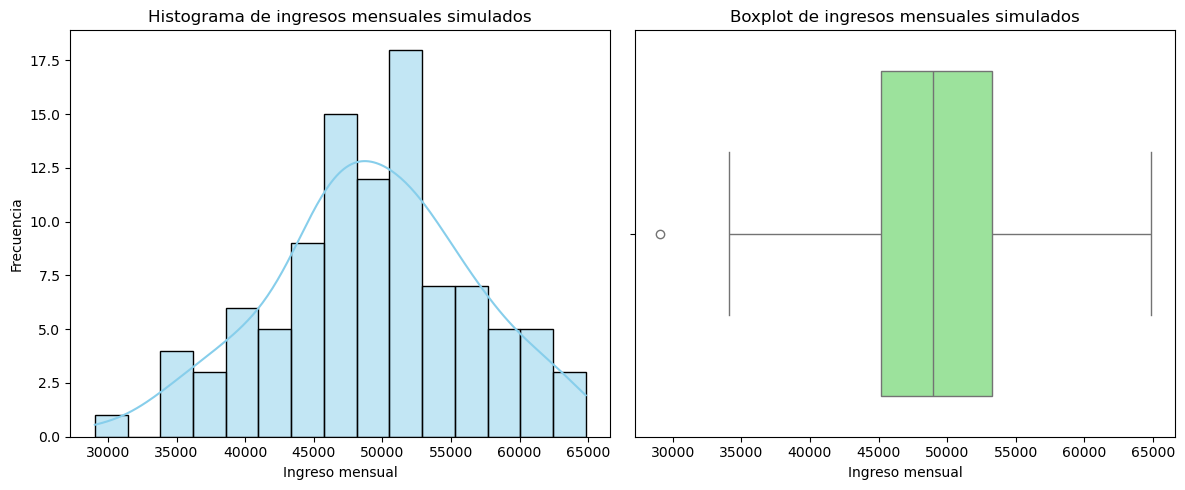

In [2]:
# Visualización de la muestra de ingresos mensuales
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(muestra, bins=15, kde=True, color='skyblue')
plt.title('Histograma de ingresos mensuales simulados')
plt.xlabel('Ingreso mensual')
plt.ylabel('Frecuencia')

plt.subplot(1,2,2)
sns.boxplot(x=muestra, color='lightgreen')
plt.title('Boxplot de ingresos mensuales simulados')
plt.xlabel('Ingreso mensual')
plt.tight_layout()
plt.show()

## Hipótesis Nula y Alternativa
- **Hipótesis Nula (H0):** El ingreso promedio poblacional es igual a $50,000.
- **Hipótesis Alternativa (H1):** El ingreso promedio poblacional es diferente de $50,000.

En la práctica, definir correctamente H0 y H1 es el primer paso crítico en cualquier prueba de hipótesis.

## Pasos para Realizar una Prueba de Hipótesis
1. Formular las hipótesis (H0 y H1)
2. Seleccionar el nivel de significancia (α)
3. Calcular el estadístico de prueba
4. Determinar la región crítica o calcular el valor-p
5. Tomar una decisión e interpretar los resultados

A continuación, aplicaremos estos pasos al ejemplo base.

In [3]:
# Paso 1: Formular las hipótesis
# H0: mu = 50000
# H1: mu != 50000

# Paso 2: Seleccionar el nivel de significancia
alpha = 0.05

# Paso 3: Calcular el estadístico de prueba (usando t porque sigma poblacional es desconocida)
import scipy.stats as stats
media_hipotetica = 50000
statistic, p_value = stats.ttest_1samp(muestra, popmean=media_hipotetica)
print(f'Estadístico t: {statistic:.3f}')
print(f'Valor p: {p_value:.4f}')

Estadístico t: -1.143
Valor p: 0.2556


## Significancia Estadística y Valor P
- El **nivel de significancia (α)** es el umbral para rechazar H0.
- El **valor p** es la probabilidad de obtener un resultado tan extremo como el observado, asumiendo que H0 es verdadera.

**Regla de decisión:**
- Si valor p < α: Rechazamos H0.
- Si valor p ≥ α: No rechazamos H0.

In [4]:
# Paso 4 y 5: Tomar una decisión e interpretar
if p_value < alpha:
    print('Rechazamos H0: Hay evidencia de que la media poblacional es diferente de $50,000')
else:
    print('No rechazamos H0: No hay evidencia suficiente para decir que la media poblacional es diferente de $50,000')

No rechazamos H0: No hay evidencia suficiente para decir que la media poblacional es diferente de $50,000


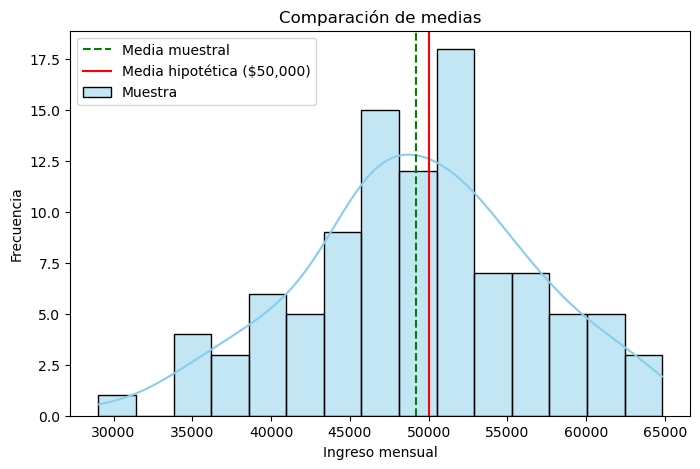

In [5]:
# Visualización: Comparación de la media muestral vs. la media hipotética
plt.figure(figsize=(8,5))
sns.histplot(muestra, bins=15, kde=True, color='skyblue', label='Muestra')
plt.axvline(muestra.mean(), color='green', linestyle='--', label='Media muestral')
plt.axvline(media_hipotetica, color='red', linestyle='-', label='Media hipotética ($50,000)')
plt.title('Comparación de medias')
plt.xlabel('Ingreso mensual')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## Pruebas sobre una Proporción de la Población
Supongamos que queremos probar si la proporción de personas con ingresos mayores a $60,000 es igual al 30%.
- H0: p = 0.3
- H1: p ≠ 0.3

In [6]:
# Creamos una variable binaria: 1 si ingreso > 60000, 0 si no
exitos = np.sum(muestra > 60000)
n = len(muestra)
p0 = 0.3

# Usamos proportions_ztest de statsmodels (más común que scipy para proporciones)
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest(count=exitos, nobs=n, value=p0)
print(f'Estadístico Z: {stat:.3f}')
print(f'Valor p: {pval:.4f}')
if pval < alpha:
    print('Rechazamos H0: La proporción es diferente de 0.3')
else:
        print('No rechazamos H0: No hay evidencia suficiente para decir que la proporción es diferente de 0.3')

Estadístico Z: -8.109
Valor p: 0.0000
Rechazamos H0: La proporción es diferente de 0.3


C:\Users\adria\AppData\Local\Temp\ipykernel_44940\2999697885.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette='pastel')


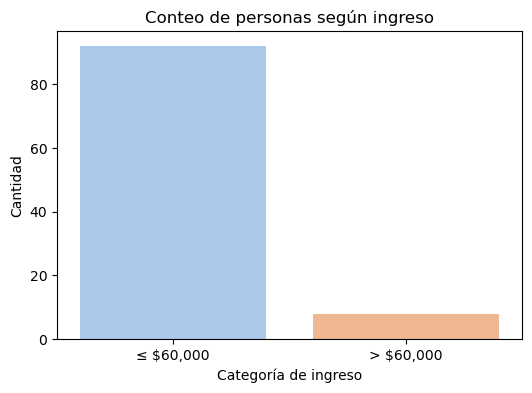

In [7]:
# Visualización: Proporción de personas con ingresos > $60,000
labels = ['≤ $60,000', '> $60,000']
counts = [np.sum(muestra <= 60000), np.sum(muestra > 60000)]
plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=counts, palette='pastel')
plt.title('Conteo de personas según ingreso')
plt.ylabel('Cantidad')
plt.xlabel('Categoría de ingreso')
plt.show()

## Errores Tipo I y Tipo II
- **Error Tipo I (α):** Rechazar H0 cuando es verdadera.
- **Error Tipo II (β):** No rechazar H0 cuando es falsa.

Aumentar el tamaño de la muestra ayuda a reducir ambos errores.

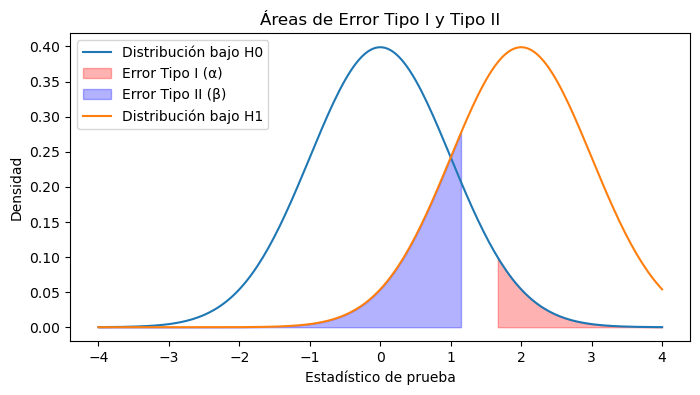

In [8]:
# Visualización conceptual de Errores Tipo I y Tipo II
from scipy.stats import norm
x = np.linspace(-4, 4, 200)
alpha = 0.05
beta = 0.2
plt.figure(figsize=(8,4))
plt.plot(x, norm.pdf(x), label='Distribución bajo H0')
plt.fill_between(x, 0, norm.pdf(x), where=(x > norm.ppf(1-alpha)), color='red', alpha=0.3, label='Error Tipo I (α)')
plt.fill_between(x, 0, norm.pdf(x, loc=2, scale=1), where=(x < norm.ppf(beta, loc=2, scale=1)), color='blue', alpha=0.3, label='Error Tipo II (β)')
plt.plot(x, norm.pdf(x, loc=2, scale=1), label='Distribución bajo H1')
plt.legend()
plt.title('Áreas de Error Tipo I y Tipo II')
plt.xlabel('Estadístico de prueba')
plt.ylabel('Densidad')
plt.show()

## Pruebas Unilaterales y Bilaterales
En las pruebas de hipótesis, la formulación de la hipótesis alternativa (H1) determina si la prueba es unilateral (una cola) o bilateral (dos colas):

- **Unilateral (una cola):** H1: μ > μ₀ o H1: μ < μ₀. Se busca evidencia solo en una dirección.
- **Bilateral (dos colas):** H1: μ ≠ μ₀. Se busca evidencia en ambas direcciones.

A continuación, aplicamos ambos enfoques al mismo ejemplo base, usando parámetros conocidos para ilustrar la diferencia en el valor-p y la decisión.

In [11]:
# Ejemplo: Prueba unilateral y bilateral sobre la media poblacional (σ conocida)
from scipy.stats import norm
import numpy as np

# Parámetros
mu_0 = 70000  # Media bajo H0
sigma = 10000 # Desviación estándar poblacional
n = 36        # Tamaño de la muestra
x_bar = 72000 # Media muestral
alpha = 0.05  # Nivel de significancia

# Paso 1: Calcular el estadístico Z
Z = (x_bar - mu_0) / (sigma / np.sqrt(n))

# Paso 2: Calcular el valor-p
# Prueba unilateral (H1: mu > mu_0)
p_valor_unilateral = 1 - norm.cdf(Z)
# Prueba bilateral (H1: mu != mu_0)
p_valor_bilateral = 2 * (1 - norm.cdf(abs(Z)))

# Resultados
print(f"Estadístico Z: {Z:.2f}")
print(f"Valor-p (unilateral): {p_valor_unilateral:.4f}")
print(f"Valor-p (bilateral): {p_valor_bilateral:.4f}")

# Decisión
if p_valor_unilateral < alpha:
    print("Unilateral: Se rechaza H0.")
else:
    print("Unilateral: No se rechaza H0.")

if p_valor_bilateral < alpha:
    print("Bilateral: Se rechaza H0.")
else:
    print("Bilateral: No se rechaza H0.")

Estadístico Z: 1.20
Valor-p (unilateral): 0.1151
Valor-p (bilateral): 0.2301
Unilateral: No se rechaza H0.
Bilateral: No se rechaza H0.


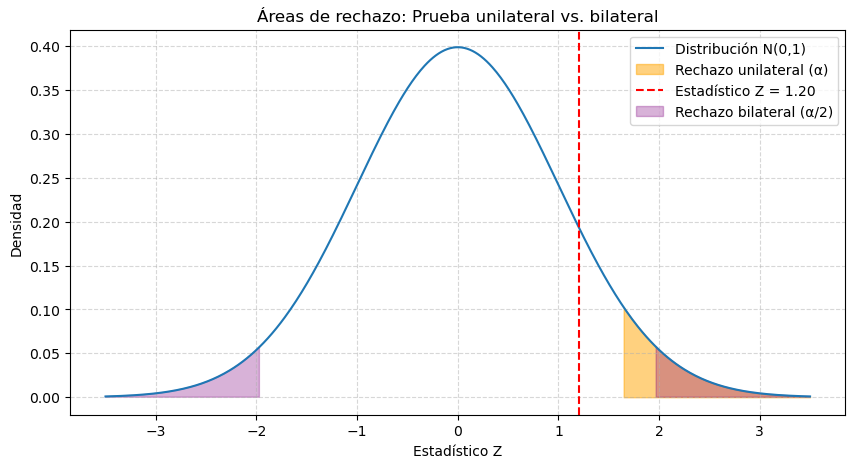

In [10]:
# Visualización: Diferencia entre prueba unilateral y bilateral
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu_0 = 70000
sigma = 10000
n = 36
x_bar = 72000
alpha = 0.05

# Estadístico Z
Z = (x_bar - mu_0) / (sigma / np.sqrt(n))
x = np.linspace(-3.5, 3.5, 500)
y = norm.pdf(x)

plt.figure(figsize=(10,5))
plt.plot(x, y, label='Distribución N(0,1)')

# Área de rechazo unilateral (cola derecha)
z_alpha_uni = norm.ppf(1-alpha)
plt.fill_between(x, 0, y, where=(x > z_alpha_uni), color='orange', alpha=0.5, label='Rechazo unilateral (α)')
plt.axvline(Z, color='red', linestyle='--', label=f'Estadístico Z = {Z:.2f}')

# Área de rechazo bilateral (ambas colas)
z_alpha_bi = norm.ppf(1-alpha/2)
plt.fill_between(x, 0, y, where=(x > z_alpha_bi) | (x < -z_alpha_bi), color='purple', alpha=0.3, label='Rechazo bilateral (α/2)')

plt.title('Áreas de rechazo: Prueba unilateral vs. bilateral')
plt.xlabel('Estadístico Z')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Diseño de Experimento y Poder Estadístico
- Un buen diseño experimental define claramente el objetivo, variables y tamaño de muestra.
- El **poder estadístico** es la probabilidad de detectar un efecto real (1 - β).
- Factores que aumentan el poder: mayor tamaño de muestra, mayor efecto, menor variabilidad, mayor α.

In [ ]:
# Visualización: Cómo el tamaño de muestra afecta el poder estadístico
import numpy as np
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt

# Parámetros
effect_size = 0.5  # Tamaño del efecto (d de Cohen)
alpha = 0.05       # Nivel de significancia
power = 0.8        # Poder deseado

# Rango de tamaños de muestra
sample_sizes = np.arange(5, 201, 5)
analysis = TTestIndPower()
powers = analysis.power(effect_size=effect_size, nobs1=sample_sizes, alpha=alpha, ratio=1.0, alternative='two-sided')

plt.figure(figsize=(8,5))
plt.plot(sample_sizes, powers, color='purple')
plt.axhline(power, color='red', linestyle='--', label='Poder deseado (0.8)')
plt.title('Relación entre tamaño de muestra y poder estadístico')
plt.xlabel('Tamaño de muestra por grupo')
plt.ylabel('Poder estadístico')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Explicación:
# Este gráfico muestra cómo, al aumentar el tamaño de muestra, el poder estadístico también aumenta, facilitando la detección de efectos reales en los datos.